In [1]:

import pandas as pd
from tqdm import tqdm
#Ignore some warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = 500

In [3]:


imdb_df = pd.read_csv("/Users/dougs/Documents/GitHub/Project-Evaluation/data/descriptive_movie_data_from_tmdb.csv")
df = pd.read_excel("/Users/dougs/Documents/GitHub/audience-evaluation/data/Weekend 1 & 2 Exits - All Titles Jan 2021 - Aug 2024_v2.xlsx")

In [4]:
df['OBO'] = pd.to_numeric(df['OBO'], errors='coerce')
df['DBO'] = pd.to_numeric(df['DBO'], errors='coerce')

df['10-12'] = pd.to_numeric(df['10-12'], errors='coerce')


df.rename({ 'PostTrak\nFilm\nType':'type','Locs\nat\nOpening':'locs_open', 'Locs\nat\nWidest\nRelease':'locs_wide',
       'Definitely\nRecommend' :'def_rec', 'Release\nDate':"release_date"}, axis=1, inplace=True)

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['quarter_year'] = df['release_date'].dt.to_period('Q').astype(str)
df = df.query("release_date >='1/1/2021'")

In [6]:
audit_df = df[['Title']]
audit_df['imdb_id'] = None
audit_df.to_clipboard()

In [7]:
movie_title_list = list(imdb_df.title.unique())

In [8]:
genrelist = ['FAM','ANI']

In [9]:
filtered_df = df.query("Genre ==@genrelist & Rating ==['PG']")
filtered_df.columns

Index(['Title', 'type', 'release_date', 'Genre', 'Rating', 'Dist', 'OBO',
       'DBO', 'locs_open', 'locs_wide', 'Polling\nWk', 'def_rec',
       'Total Excellent', '\nM<25\nExcellent', 'M 25+ Excellent',
       'F <25 Excellent', 'F25+ Excellent', 'White - Excellent',
       'Latine \nExcellent', 'AA\nExcellent', 'Asian\nExcellent',
       'Other\nExcellent', 'Gen', 'Par', 'Kid', 'M', 'F', 'M\n25<', 'M\n25+',
       'F\n25<', 'F\n25+', 'M\n7<', 'M\n7-9', 'M\n10-12', 'F\n7<', 'F\n7-9',
       'F\n10-12', '25<', '25+', '7<', '7-9', '10-12', '13-17', '18-24',
       '25-34', '35-44', '45-54', '55+', 'Cauc', 'Hisp', 'AA', 'Asian',
       'NatAm/\nOther', 'quarter_year'],
      dtype='object')

In [10]:
analysis_df = filtered_df[['Title', 'type', 'Genre', 'Rating',
       'Dist', 'OBO', 'DBO', 'locs_open', 'locs_wide',
       'def_rec', 'Total Excellent', 'M', 'F', 'M\n25<', 'M\n25+', 'F\n25<', 'F\n25+', 'M\n7<',
       'M\n7-9', 'M\n10-12', 'F\n7<', 'F\n7-9', 'F\n10-12', '25<', '25+', '7<',
       '7-9', '10-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55+',
       'Cauc', 'Hisp', 'AA', 'Asian', 'NatAm/\nOther']]

In [11]:
numerical_cols = ['OBO', 'DBO', 'locs_open', 'locs_wide',
       'def_rec', 'Total Excellent', 'M', 'F', 
        '25<', '25+', '10-12', '13-17', '18-24', '25-34', '35-44', '45-54', '55+',
       'Cauc', 'Hisp', 'AA', 'Asian', 'NatAm/\nOther']

In [12]:
analysis_df.replace('-', 0, inplace=True)
analysis_df[['OBO', 'DBO']] = analysis_df[['OBO', 'DBO']] / 1_000_000
df[['OBO', 'DBO']] = df[['OBO', 'DBO']] / 1_000_000


## Comparison

In [14]:
df.groupby(by='Genre')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
Genre,,,,,,,,,,,,,,,,,,,,,,
,50.02,137.62,3611.00,3839.00,0.69,0.56,0.17,0.83,0.46,0.54,NaN,0.08,0.38,0.24,0.12,0.08,0.11,0.55,0.29,0.06,0.07,0.03
ACT,41.12,120.42,3361.46,3407.89,0.60,0.48,0.59,0.41,0.37,0.63,0.06,0.07,0.26,0.25,0.16,0.12,0.10,0.49,0.25,0.14,0.08,0.05
ADV,37.46,101.49,3272.89,3516.00,0.58,0.45,0.56,0.44,0.41,0.59,0.07,0.07,0.27,0.24,0.16,0.11,0.09,0.55,0.20,0.14,0.07,0.04
ANI,26.23,97.48,3017.28,3100.88,0.63,0.54,0.51,0.49,0.60,0.40,0.12,0.11,0.24,0.20,0.14,0.05,0.02,0.42,0.32,0.12,0.09,0.05
COM,11.02,39.71,2204.45,2573.27,0.56,0.44,0.46,0.54,0.29,0.71,0.08,0.06,0.22,0.23,0.15,0.13,0.19,0.61,0.17,0.12,0.07,0.03
DOC,2.58,6.21,1548.33,1585.67,0.62,0.51,0.50,0.50,0.19,0.81,NaN,0.04,0.16,0.16,0.18,0.20,0.26,0.73,0.15,0.08,0.03,0.02
DRA,6.39,23.34,1957.84,2195.39,0.62,0.52,0.48,0.52,0.24,0.76,0.08,0.04,0.19,0.20,0.16,0.15,0.25,0.64,0.16,0.13,0.05,0.03
FAM,10.57,37.65,2760.10,2815.40,0.59,0.48,0.44,0.56,0.51,0.49,0.12,0.10,0.15,0.14,0.16,0.09,0.10,0.56,0.25,0.11,0.05,0.04
FAN,2.92,8.29,2436.00,2436.00,0.46,0.38,0.56,0.44,0.32,0.68,NaN,0.02,0.30,0.24,0.15,0.13,0.16,0.64,0.14,0.10,0.09,0.04


In [15]:
dist_comp = df.groupby(by='Dist')[numerical_cols].mean().round(2).sort_values(by='def_rec', ascending=False)
dist_comp

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
Dist,,,,,,,,,,,,,,,,,,,,,,
FTHM,5.95,14.41,2183.00,2280.00,0.78,0.69,0.44,0.56,0.24,0.76,NaN,0.07,0.17,0.15,0.12,0.16,0.33,0.75,0.16,0.03,0.03,0.03
ANGEL,6.80,36.93,2398.43,2527.00,0.76,0.70,0.43,0.57,0.18,0.82,NaN,0.05,0.14,0.13,0.14,0.17,0.38,0.59,0.23,0.09,0.06,0.03
UP2U,0.54,1.51,1080.00,1080.00,0.76,0.68,0.47,0.53,0.24,0.76,NaN,0.05,0.18,0.09,0.17,0.15,0.35,0.70,0.23,0.06,0.00,0.01
SBD,7.65,13.30,2754.00,2770.00,0.76,0.67,0.50,0.50,0.10,0.90,NaN,0.02,0.08,0.07,0.08,0.16,0.59,0.85,0.09,0.03,0.01,0.02
Sony/Crunchyroll,6.24,10.94,1811.75,1811.75,0.72,0.68,0.56,0.44,0.51,0.49,NaN,0.11,0.41,0.37,0.08,0.02,0.01,0.34,0.26,0.08,0.28,0.05
CRUNCHY,12.54,23.74,2017.29,2126.86,0.71,0.61,0.65,0.35,0.57,0.43,0.03,0.13,0.40,0.33,0.07,0.02,0.01,0.33,0.31,0.14,0.16,0.06
MGM,12.66,46.12,1815.14,2509.29,0.70,0.61,0.52,0.48,0.33,0.67,NaN,0.05,0.27,0.23,0.15,0.12,0.18,0.59,0.16,0.15,0.05,0.04
BFE,0.44,1.27,964.00,964.00,0.67,0.55,0.40,0.60,0.38,0.62,0.13,0.08,0.10,0.13,0.13,0.17,0.17,0.77,0.10,0.04,0.04,0.05
DIS,70.48,198.80,3795.24,3819.44,0.67,0.55,0.51,0.49,0.52,0.48,0.09,0.09,0.25,0.20,0.15,0.08,0.05,0.46,0.28,0.14,0.07,0.05


<Axes: xlabel='locs_wide', ylabel='DBO'>

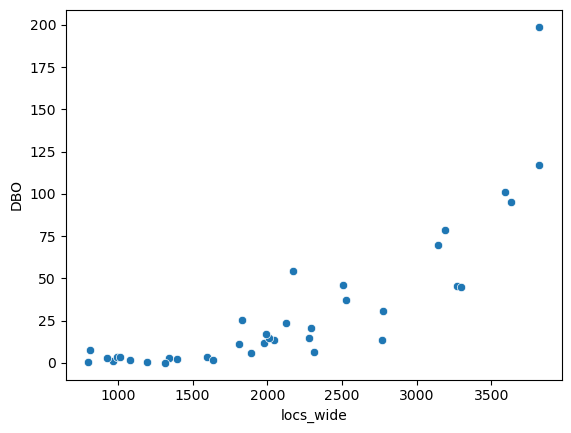

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=dist_comp, x='locs_wide', y='DBO')

<Axes: xlabel='def_rec', ylabel='DBO'>

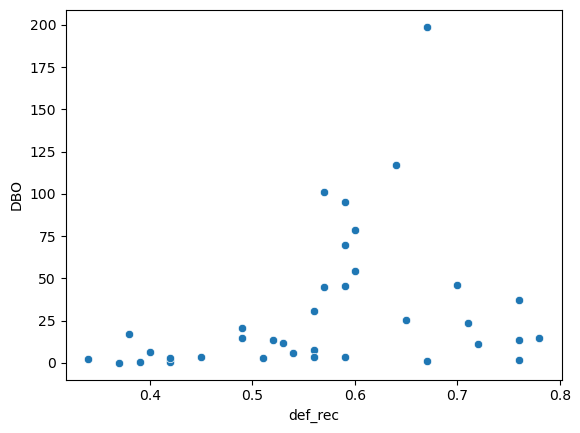

In [17]:
sns.scatterplot(data=dist_comp, x='def_rec', y='DBO')

In [18]:
df.groupby(by='Rating')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
Rating,,,,,,,,,,,,,,,,,,,,,,
G,13.15,40.13,3184.00,3189.00,0.77,0.48,0.46,0.54,0.63,0.37,0.15,0.10,0.06,0.11,0.19,0.06,0.00,0.40,0.33,0.21,0.03,0.03
NR,10.76,18.71,1844.00,1877.33,0.73,0.65,0.45,0.55,0.35,0.65,0.01,0.05,0.29,0.28,0.14,0.09,0.13,0.36,0.11,0.20,0.26,0.07
PG,23.22,88.57,2914.33,2981.86,0.62,0.52,0.46,0.54,0.49,0.51,0.12,0.10,0.17,0.15,0.15,0.09,0.11,0.52,0.27,0.11,0.06,0.04
PG13,29.77,88.14,3054.12,3166.79,0.61,0.50,0.51,0.49,0.37,0.63,0.06,0.09,0.25,0.22,0.15,0.12,0.14,0.52,0.23,0.14,0.07,0.04
R,10.95,32.84,2346.01,2559.34,0.52,0.41,0.54,0.46,0.33,0.67,NaN,0.05,0.28,0.27,0.16,0.11,0.12,0.55,0.23,0.13,0.06,0.04


In [19]:
df.groupby(by='type')[numerical_cols].mean().round(2)

,OBO,DBO,locs_open,locs_wide,def_rec,Total Excellent,M,F,25<,25+,10-12,13-17,18-24,25-34,35-44,45-54,55+,Cauc,Hisp,AA,Asian,NatAm/\nOther
type,,,,,,,,,,,,,,,,,,,,,,
Family,25.84,97.03,3260.73,3332.37,0.60,0.50,0.47,0.53,0.59,0.41,0.13,0.11,0.17,0.15,0.16,0.07,0.04,0.47,0.30,0.13,0.06,0.05
General,11.29,36.14,2430.43,2611.69,0.55,0.44,0.51,0.49,0.31,0.69,0.01,0.06,0.25,0.25,0.16,0.12,0.16,0.55,0.21,0.13,0.07,0.04
Hybrid,56.92,164.18,3650.61,3697.87,0.65,0.53,0.54,0.46,0.49,0.51,0.06,0.10,0.27,0.22,0.14,0.09,0.06,0.47,0.27,0.13,0.08,0.05


## Trends


In [21]:
trend_df = df.groupby(by=["quarter_year", 'Genre'])[numerical_cols].mean().round(2).reset_index()

In [22]:
df.Genre.unique()

array(['HOR', 'SUS', 'DRA', 'ACT', ' ', 'FAM', 'COM', 'ANI', 'WES', 'SCI',
       'ADV', 'ROMANCE', 'SPECIAL', 'MUS', 'RCOM', 'DOC', 'FAN'],
      dtype=object)

In [23]:
genres = ['ANI']

genre_df = trend_df.query("Genre==@genres")
overall_df = trend_df.query("Genre!=@genres")

The max for the Genre over the timeframe was 356.07 on 2024Q3 while the last value was 356.07.
This represents a Last to Max Ratio of 1.0


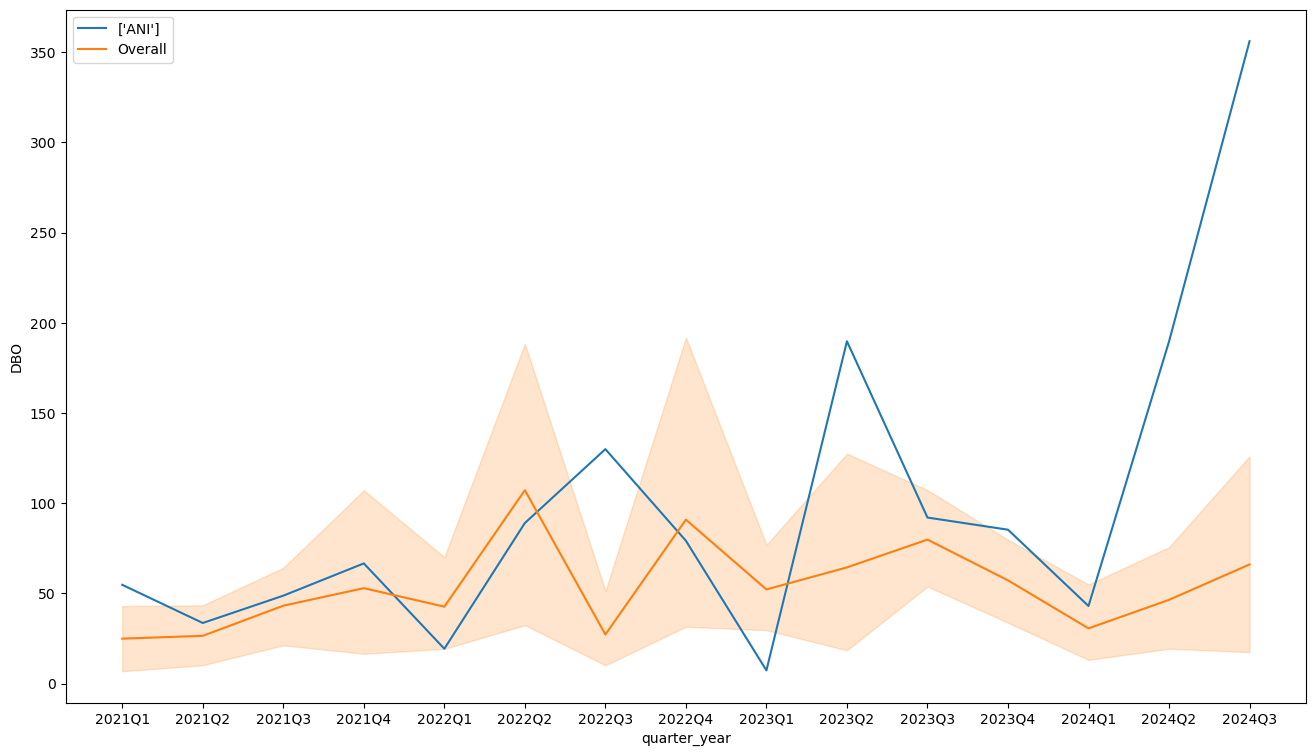

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
sns.lineplot(data=genre_df, x='quarter_year', y='DBO' ,label=genres, errorbar=None)
sns.lineplot(data=overall_df, x='quarter_year', y='DBO', label='Overall')


## Peak End Analysis
peak_end = genre_df.groupby('quarter_year')['DBO'].mean()
max_genre = peak_end.max()
max_date = peak_end[peak_end == max_genre].index[0]
last_genre = peak_end[-1:].values[0]
ratio = last_genre/max_genre
print (f"The max for the Genre over the timeframe was {max_genre} on {max_date} while the last value was {last_genre}.\nThis represents a Last to Max Ratio of {round(ratio,2)}")

In [25]:
genre_df.groupby('quarter_year')['DBO'].mean()

quarter_year
2021Q1     54.72
2021Q2     33.56
2021Q3     48.71
2021Q4     66.59
2022Q1     19.28
2022Q2     88.98
2022Q3    129.94
2022Q4     79.15
2023Q1      7.29
2023Q2    189.73
2023Q3     92.02
2023Q4     85.28
2024Q1     42.98
2024Q2    189.58
2024Q3    356.07
Name: DBO, dtype: float64

In [26]:
index = peak_end[peak_end == max_genre].index[0]
index

'2024Q3'

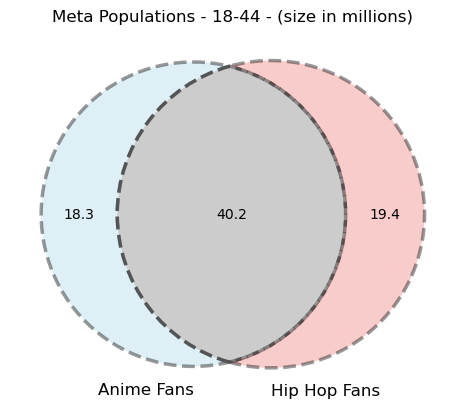

In [27]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the two populations and their overlap
size_A = 58.5  # Size of population A
size_B = 59.6  # Size of population B
overlap = 40.2  # Size of the overlap

# Create a Venn diagram
venn = venn2(subsets=(round(size_A - overlap, 2), round(size_B - overlap, 2), overlap),
      set_labels=('Anime Fans', 'Hip Hop Fans'))
# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'gray']  # Define colors for the two circles
for i, patch in enumerate(venn.patches):
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor('black')  # Set the edge color
    patch.set_linestyle('--')  # Set linestyle to dashed
    patch.set_linewidth(2.5)  # Set line width (thickness)
# Show the plot
plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()

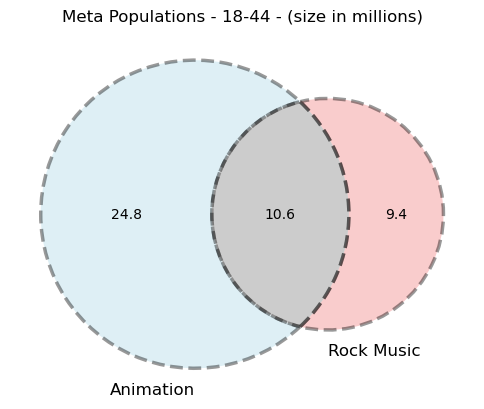

In [28]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the two populations and their overlap
size_A = 35.4  # Size of population A
size_B = 20  # Size of population B
overlap = 10.6  # Size of the overlap

# Create a Venn diagram
venn = venn2(subsets=(round(size_A - overlap, 2), round(size_B - overlap, 2), overlap),
              set_labels=('Animation', 'Rock Music'))

# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'gray']  # Define colors for the two circles
for i, patch in enumerate(venn.patches):
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor('black')  # Set the edge color
    patch.set_linestyle('--')  # Set linestyle to dashed
    patch.set_linewidth(2.5)  # Set line width (thickness)

# Show the plot
plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()

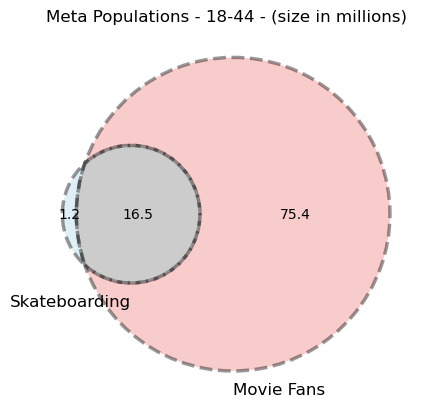

In [1]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Define the sizes of the two populations and their overlap
size_A = 17.7  # Size of population A
size_B = 91.9  # Size of population B
overlap = 16.5  # Size of the overlap

# Create a Venn diagram
venn = venn2(subsets=(round(size_A - overlap, 2), round(size_B - overlap, 2), overlap),
              set_labels=('Skateboarding', 'Movie Fans'))

# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'gray']  # Define colors for the two circles
for i, patch in enumerate(venn.patches):
    patch.set_facecolor(colors[i])  # Set the face color
    patch.set_edgecolor('black')  # Set the edge color
    patch.set_linestyle('--')  # Set linestyle to dashed
    patch.set_linewidth(2.5)  # Set line width (thickness)

# Show the plot
plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()

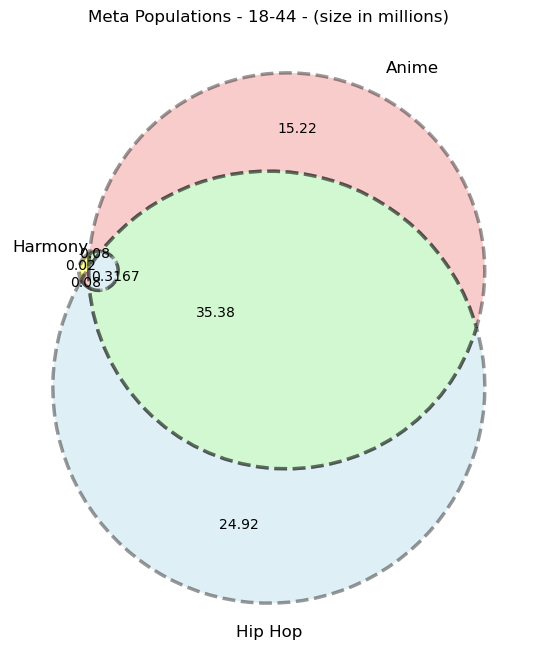

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Define the sizes of the three populations and their overlaps
size_A = 0.5  # Harmony Fans
size_B = 51  # Anime Fans
size_C = 60.7  # Hip Hop Fans

# Define the overlaps between the sets
overlap_AB = 0.4  # Overlap between Harmony and Anime Fans
overlap_AC = 0.4   # Overlap between Harmony and Hip Hop Fans
overlap_BC = 35.7  # Overlap between Anime and Hip Hop Fans
overlap_ABC = 0.3167  # Overlap between all three groups

# Create a Venn diagram with three sets
venn = venn3(subsets=(round(size_A - overlap_AB - overlap_AC + overlap_ABC, 2),  # Only Harmony
                      round(size_B - overlap_AB - overlap_BC + overlap_ABC, 2),  # Only Anime
                      round(overlap_AB - overlap_ABC, 2),                        # Harmony and Anime Fans only
                      round(size_C - overlap_AC - overlap_BC + overlap_ABC, 2),  # Only Hip Hop
                      round(overlap_AC - overlap_ABC, 2),                        # Harmony and Hip Hop Fans only
                      round(overlap_BC - overlap_ABC, 2),                        # Anime and Hip Hop Fans only
                      overlap_ABC),                                              # Harmony, Anime, and Hip Hop
              set_labels=('Harmony', 'Anime', 'Hip Hop'))

# Customize the properties of the circles
colors = ['lightblue', 'lightcoral', 'lightgreen']  # Define colors for the three circles
for i, patch in enumerate(venn.patches):
    if patch:  # Some patches might be None if there are no overlaps
        patch.set_facecolor(colors[i % 3])  # Set the face color
        patch.set_edgecolor('black')  # Set the edge color
        patch.set_linestyle('--')  # Set linestyle to dashed
        patch.set_linewidth(2.5)  # Set line width (thickness)

# Increase the scale of the diagram
plt.gca().set_aspect('equal', adjustable='box')  # Make the diagram more balanced
plt.gcf().set_size_inches(8, 8)  # Make the plot larger

# Add a thicker border to the small circle for better visibility
if venn.get_label_by_id('100'):
    venn.get_label_by_id('100').set_fontsize(10)  # Increase font size of small circle label
if venn.get_patch_by_id('100'):
    venn.get_patch_by_id('100').set_linewidth(3)  # Thicken the outline of the small circle
    venn.get_patch_by_id('100').set_facecolor('yellow')  # Highlight the small circle

# Show the plot
plt.title("Meta Populations - 18-44 - (size in millions)")
plt.show()